# 선형 회귀 분석

In [1]:
X = [32, 64, 96, 118, 126, 144, 152, 158]
Y = [17, 24, 62, 49, 52, 105, 130, 125]

In [2]:
import numpy as np
A = np.c_[X,np.ones(8)]
B = np.array(Y)

In [3]:
model = np.linalg.inv(A.T@A) @ A.T @ B
model

array([  0.87962664, -27.35846347])

In [ ]:
# y = 0.87962 *x -27.3584인 모델이 생성된다

In [6]:
from scipy import stats

In [7]:
stats.linregress(X,Y) 

LinregressResult(slope=0.8796266379465087, intercept=-27.3584634715491, rvalue=0.89008928103186, pvalue=0.003051790677096642, stderr=0.18388671751663876, intercept_stderr=21.848883987057672)

In [ ]:
#오차(추정값-실제값)의 제곱의 평균(mse)
#오차(추정값-실제값)의 제곱의 평균에 루트(RMSE)

In [ ]:
# 결정계수 R-squared 회귀식이 데이터를 얼마나 설명하는지의 여부 0~1사이 89%설명한다.
# 유의확률 p-value 귀무가설을 기각하지 않을 확률

In [8]:
# y = a*x**2 + b*x +c

In [9]:
X

[32, 64, 96, 118, 126, 144, 152, 158]

In [10]:
Y

[17, 24, 62, 49, 52, 105, 130, 125]

In [11]:
fit = np.polyfit(X,Y,1)

In [12]:
fit

array([  0.87962664, -27.35846347])

In [13]:
def func1(x):
    y = fit[0]*x + fit[1]
    return y

In [14]:
func1(50)

16.622868425776364

In [15]:
func2 = np.poly1d(fit)

In [16]:
func2

poly1d([  0.87962664, -27.35846347])

In [17]:
func2(50)

16.622868425776364

In [28]:
fit2 = np.polyfit(X,Y,2)

In [29]:
fit2

array([ 9.01276143e-03, -8.67975467e-01,  3.98246113e+01])

In [30]:
fit_fn2 = np.poly1d(fit2)

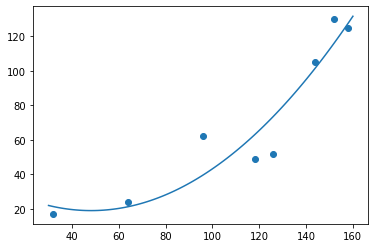

In [31]:
import matplotlib.pyplot as plt
plt.scatter(X, Y)
sample_X=np.linspace(30,160,100)
plt.plot(sample_X,fit_fn2(sample_X))

In [33]:
def draw_polyfit(X,Y,deg=1):
    fit2 = np.polyfit(X,Y,deg)
    fit_fn2 = np.poly1d(fit2)
    plt.scatter(X, Y)
    sample_X=np.linspace(30,160,100)
    plt.plot(sample_X,fit_fn2(sample_X))
    plt.show()

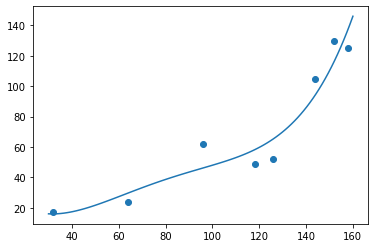

In [38]:
draw_polyfit(X,Y,4)

## 포뮬러를 이용한 회귀식

In [1]:
import pandas as pd
import numpy as np

In [2]:
X = [32, 64, 96, 118, 126, 144, 152, 158]
Y = [17, 24, 62, 49, 52, 105, 130, 125]

In [3]:
df = pd.DataFrame(np.c_[X,Y], columns=['x','y'])

In [5]:
from statsmodels.formula.api import ols
model = ols('Y ~ X', data = df)
result = model.fit()
result.params

Intercept   -27.358463
X             0.879627
dtype: float64

In [19]:
model2 = ols("y ~ x + I(x**2) + I(x**3) -1 ",data=df)
result2 = model2.fit()
result2.params

x            1.005637
I(x ** 2)   -0.013981
I(x ** 3)    0.000082
dtype: float64

In [16]:
y_ = result2.predict(df.x)

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

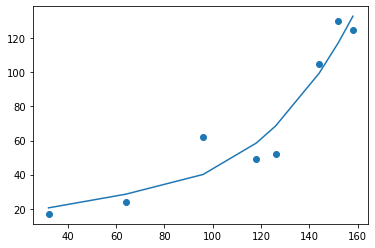

In [18]:
plt.scatter(X,Y)
plt.plot(X,y_)
plt.show()

In [46]:
import numpy as np
n_samples = 30
np.random.seed(0)
X = np.sort(np.random.rand(n_samples))
y = np.sin(2*np.pi * X) + np.random.randn(n_samples)*0.1

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

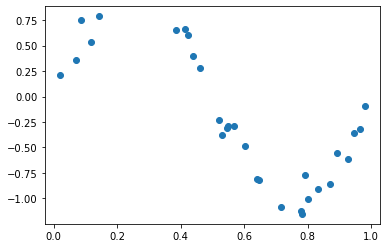

In [48]:
plt.scatter(X,y)
plt.show()

In [49]:
df = pd.DataFrame(np.c_[X,y], columns=['x','y'])
model = ols('y ~ x', data=df)
result = model.fit()
result.params

Intercept    0.713959
x           -1.642204
dtype: float64

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

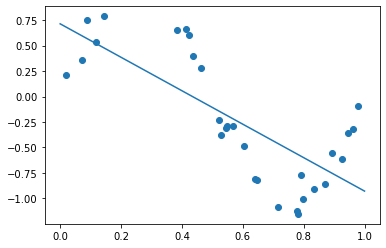

In [51]:
plt.scatter(X,y)
xx = np.linspace(0,1,1000)
plt.plot(xx, result.predict({'x':xx}))
plt.show()

### 정규화를 하지 않은 회귀모형

In [52]:
from statsmodels.formula.api import ols

In [53]:
model9 = ols("y ~ x + I(x**2) + I(x**3) + I(x**4) + I(x**5) + I(x**6) +\
I(x**7) + I(x**8) + I(x**9)", data=df)

In [54]:
result9 = model9.fit()
result9.params

Intercept       -0.169863
x               25.735773
I(x ** 2)     -428.141683
I(x ** 3)     3866.723113
I(x ** 4)   -18340.939657
I(x ** 5)    49326.072526
I(x ** 6)   -78884.743043
I(x ** 7)    74538.645124
I(x ** 8)   -38453.132176
I(x ** 9)     8350.254983
dtype: float64

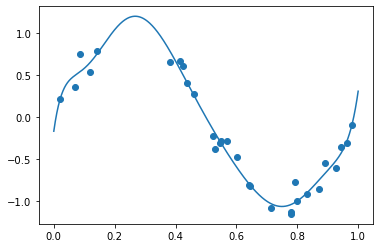

In [55]:
plt.scatter(X,y)
plt.plot(xx, result9.predict({'x':xx}))
plt.show()

### Lasso 회귀모형

In [65]:
model9 = ols("y ~ x + I(x**2) + I(x**3) + I(x**4) + I(x**5) + I(x**6) +\
I(x**7) + I(x**8) + I(x**9)", data=df)

In [66]:
result9 = model9.fit_regularized(L1_wt=1, alpha=0.01)
print(result9.params)

Intercept    0.687949
x           -1.129134
I(x ** 2)   -1.124878
I(x ** 3)    0.000000
I(x ** 4)    0.000000
I(x ** 5)    0.000000
I(x ** 6)    0.000000
I(x ** 7)    0.000000
I(x ** 8)    0.281484
I(x ** 9)    1.075281
dtype: float64


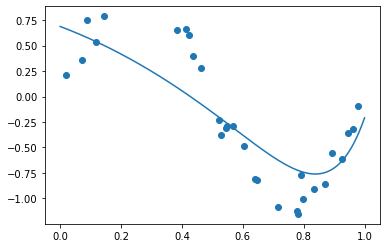

In [58]:
plt.scatter(X,y)
plt.plot(xx, result9.predict({'x':xx}))
plt.show()

### Ridge 회귀모형

In [69]:
model9 = ols("y ~ x + I(x**2) + I(x**3) + I(x**4) + I(x**5) + I(x**6) +\
I(x**7) + I(x**8) + I(x**9)", data=df)

In [70]:
result9 = model9.fit_regularized(L1_wt = 0, alpha=0.01)
print(result9.params)

[ 0.63308745 -0.75705866 -1.07056551 -0.76835135 -0.35530367  0.0121939
  0.29917825  0.50969248  0.65793698  0.75851865]


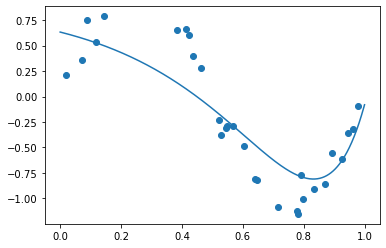

In [71]:
plt.scatter(X, y)
plt.plot(xx, result9.predict({"x":xx}))
plt.show()

### Elastic Net 회귀모형

In [76]:
model9 = ols("y ~ x + I(x**2) + I(x**3) + I(x**4) + I(x**5) + I(x**6) +\
I(x**7) + I(x**8) + I(x**9)", data=df)

In [79]:
result9 = model9.fit_regularized(L1_wt=0.5, alpha=0.01)
print(result9.params)

Intercept    0.656203
x           -0.849745
I(x ** 2)   -1.262902
I(x ** 3)   -0.425687
I(x ** 4)    0.000000
I(x ** 5)    0.000000
I(x ** 6)    0.000000
I(x ** 7)    0.304049
I(x ** 8)    0.631908
I(x ** 9)    0.801206
dtype: float64


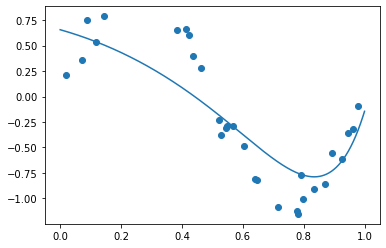

In [80]:
plt.scatter(X,y)
plt.plot(xx,result9.predict({'x':xx}))
plt.show()

## scikit-Learn의 정규화 회귀모형

### 일반 회귀

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
np.random.seed(0)
n_samples=30
x = np.sort(np.random.rand(n_samples))
y = np.sin(2 * np.pi * x) + np.random.randn(n_samples) * 0.1
X = X[:,np.newaxis]

In [91]:
def plot_model(model):
    plt.scatter(X,y)
    x = np.linspace(0,1,1000)
    plt.plot(x, model.predict(x[:,np.newaxis]))
    plt.show()

In [92]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

[ 0.00000000e+00  2.57357731e+01 -4.28141684e+02  3.86672312e+03
 -1.83409397e+04  4.93260726e+04 -7.88847431e+04  7.45386452e+04
 -3.84531322e+04  8.35025499e+03]


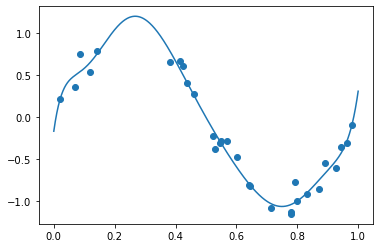

In [93]:
poly = PolynomialFeatures(9)
model = make_pipeline(poly, LinearRegression()).fit(X,y)
print(model.steps[1][1].coef_)
plot_model(model)

### Lasso

In [ ]:
from sklearn.linear_model import Lasso
model = make_pipeline(poly, Lasso(alpha=0.01)).fit(X, y)
print(model.steps[1][1].coef_)
plot_model(model)

### Ridge

In [ ]:
from sklearn.linear_model import Ridge
model = make_pipeline(poly, Ridge(alpha=0.01)).fit(X, y)
print(model.steps[1][1].coef_)
plot_model(model)

### Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet
model = make_pipeline(poly, ElasticNet(alpha=0.01, l1_ratio=0.5)).fit(X, y)
print(model.steps[1][1].coef_)
plot_model(model)

In [ ]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
alpha = np.logspace(-3, 1, 5)
data = []
for i, a in enumerate(alpha):
ridge = Ridge(alpha=a).fit(X, y)
data.append(pd.Series(np.hstack([ridge.intercept_, ridge.coef_])))
df_ridge = pd.DataFrame(data, index=alpha).T
df_ridge

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
alpha = np.logspace(-3, 1, 5)
data = []
for i, a in enumerate(alpha):
    lasso = Lasso(alpha=a).fit(X, y)
    data.append(pd.Series(np.hstack([lasso.intercept_, lasso.coef_])))
df_lasso = pd.DataFrame(data, index=alpha).T
df_lasso

In [ ]:
ax1 = plt.subplot(121)
plt.semilogx(df_ridge.T)
plt.xticks(alpha, label=np.log10(alpha))
plt.title("Ridge")
ax2 = plt.subplot(122)
plt.semilogx(df_lasso.T)
plt.xticks(alpha, label=np.log10(alpha))
plt.title("Lasso")
plt.show()

# 다중 회귀분석

In [94]:
from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
y = boston.target

In [95]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.3)

In [96]:
from sklearn.linear_model import LinearRegression
model_boston = LinearRegression()
model_boston.fit(train_X, train_y)

LinearRegression()

##### score는 R2결정계수(상관계수 제곱)를 출력한다

In [97]:
model_boston.score(train_X, train_y)

0.7239556993159119

In [101]:
from sklearn.model_selection import cross_val_score
r2 = cross_val_score(model_boston, train_X, train_y, cv=5)
r2

array([0.66113501, 0.69214809, 0.57776026, 0.74143865, 0.59846302])

In [102]:
r2.mean()

0.6541890080257788

##### mse, rmse로 모델 평가하기 mse에 루트는 rmse

In [104]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(train_y, model_boston.predict(train_X)))

4.897816990524917

In [105]:
y_pred = model_boston.predict(test_X)
y_pred

array([30.7032547 , 35.80979992, 18.04955474, 22.89317862, 23.14953529,
       20.50455574,  6.84024331, 21.01811277, 23.32224062, 18.36324033,
       10.11720854, 27.1652576 , 25.4076632 , 18.85803365, 32.92741839,
       30.69851475, 17.76547532, 10.60177536, 27.14925315, 15.06461734,
       18.26929532, 27.82076062, 21.54797712, 34.42336903, 23.27878763,
       28.29563701, 26.50356218, 19.45605401, 20.42651237, 26.2626683 ,
       38.67717312, 24.86272107, 20.07410651, 13.39156544, 14.73220266,
       20.35324272, 17.96466757, 31.25045294, 39.11708652, 27.1283693 ,
       24.98434249, 19.78798185, 18.92826258, 24.32047345, 15.58407122,
       14.76511889, 30.92076081, 22.13540571, 19.06096416, 25.53225876,
       19.44199593, 20.73940371, 24.94600043, 23.65677886, 20.76606663,
       14.3727438 ,  7.32417756, 24.46311992, 12.25150209, 19.26202879,
       17.77032628, 22.11063325, 12.27156309, 24.73882362, 21.23578672,
       23.33716934, 20.42077019, 36.03190177, 24.02350731, 32.98

In [106]:
import math
from sklearn.metrics import mean_squared_error

In [107]:
rmse_test= math.sqrt(mean_squared_error(test_y, y_pred))
rmse_test

4.1982157082568055

In [108]:
from sklearn.metrics import r2_score
r2_score(test_y, y_pred)

0.7757635206336674

In [109]:
import statsmodels.api as sm
Boston = sm.datasets.get_rdataset('Boston', package='MASS')
boston_df = Boston.data
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [111]:
import statsmodels.formula.api as smf
formula = 'medv~'+'+'.join(boston_df.iloc[:,:-1].columns)
model_boston = smf.ols(formula=formula, data=boston_df).fit()

In [112]:
model_boston.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 10 Jan 2022   Prob (F-statistic):          6.72e-135
Time:                        12:28:31   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [113]:
import statsmodels.formula.api as smf
formula = 'medv ~ rad + zn + rm + chas + age -1'
model_boston2 = smf.ols(formula=formula, data=boston_df).fit()

In [114]:
model_boston2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.931
Method:                 Least Squares   F-statistic:                              1363.
Date:                Mon, 10 Jan 2022   Prob (F-statistic):                   5.05e-289
Time:                        12:30:27   Log-Likelihood:                         -1654.6
No. Observations:                 506   AIC:                                      3319.
Df Residuals:                     501   BIC:                                      3340.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
rad           -0.2183      0.037     -5.924      0.000      -0.291      -0.146
zn             0.0161      0.015      1.056      0.291      -0.014       0.046
rm             4.7232      0.147     32.166      0.000       4.435       5.012
chas           5.6944      1.128      5.047      0.000       3.478       7.911
age           -0.0792      0.012     -6.358      0.000      -0.104      -0.055
==============================================================================
Omnibus:                      234.375   Durbin-Watson:                   0.708
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1253.471
Skew:                           2.008   Prob(JB):                    6.49e-273
Kurtosis:                       9.583   Cond. No.                         299.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 다중공선성

In [115]:
#VIF 확인하기
import statsmodels.api as sm
Boston = sm.datasets.get_rdataset('Boston', package='MASS')
boston_df = Boston.data

In [116]:
formula = 'medv~'+ '+'.join(boston_df.columns[:-1])

In [117]:
from patsy import dmatrices
y, X = dmatrices(formula, boston_df, return_type='dataframe')

In [118]:
import pandas as pd
vif = pd.DataFrame()

In [122]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif['VIF Factor'] = [variance_inflation_factor(X.values,i)
                     for i in range(X.shape[1])]
vif['Features'] = X.columns
vif.sort_values(by='VIF Factor', ascending=False)

,VIF Factor,Features
0,585.265238,Intercept
10,9.008554,tax
9,7.484496,rad
5,4.393720,nox
3,3.991596,indus
8,3.955945,dis
7,3.100826,age
13,2.941491,lstat
2,2.298758,zn
6,1.933744,rm


In [125]:
def get_vif(formula, df):
    from patsy import dmatrices
    y, X = dmatrices(formula, df, return_type='dataframe')
    import pandas as pd
    vif = pd.DataFrame()
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif['VIF Factor'] = [variance_inflation_factor(X.values,i)
                        for i in range(X.shape[1])]
    vif['features'] = X.columns
    vif.sort_values(by='VIF Factor', ascending=False, inplace=True)
    return vif

In [127]:
feature_cols = list(boston_df.columns[:-1])
while True :
    formula = "medv~" + "+".join(feature_cols)+"-1"
    vif = get_vif(formula, boston_df)
    if vif.iloc[0,0] > 10:
        feature_cols.remove(vif.iloc[0,1])
    else :
        break

In [128]:
vif

,VIF Factor,features
2,6.900077,indus
6,6.726973,lstat
5,4.678181,rad
4,3.968908,dis
1,2.299351,zn
0,2.067135,crim
3,1.086574,chas


# 회귀모형 성능평가

In [129]:
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [131]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

In [132]:
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

In [133]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.3)

In [134]:
lasso = linear_model.Lasso()
model = lasso.fit(train_X, train_y)
model

Lasso()

In [135]:
pred = model.predict(test_X)
pred[:10]

array([196.02885183, 136.7917551 , 142.53485501, 137.79396214,
       129.36524515, 176.86462989, 115.32324222, 193.36167238,
       186.77968383, 125.56193654])

## mean_squared_error

In [141]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_y, pred)

3431.1954811992846

## Root_mean_squared_error

In [142]:
import math
rmse = math.sqrt(mean_squared_error(test_y,pred))
rmse

58.57640720630862

## mean_absolute_error

In [143]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_y,pred)

49.540550616414194

## explained_variance_score

In [144]:
from sklearn.metrics import explained_variance_score
explained_variance_score(test_y, pred)

0.3915834412757312

## r2_score

In [145]:
from sklearn.metrics import r2_score
r2_score(test_y, pred)

0.3882990366614101

# 연습문제

In [146]:
import statsmodels.api as sm
cars = sm.datasets.get_rdataset('cars', package='datasets')
cars_df = cars.data

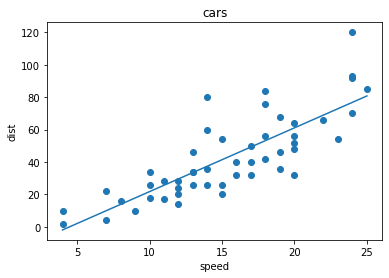

In [147]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
plt.scatter(cars_df.speed, cars_df.dist)
fit = np.polyfit(cars_df.speed, cars_df.dist,1)
fit_fn = np.poly1d(fit)
plt.plot(cars_df.speed, fit_fn(cars_df.speed))
plt.xlabel('speed')
plt.ylabel('dist')
plt.title('cars')
plt.show()

In [148]:
import statsmodels.formula.api as sm
model_cars = sm.ols(formula='dist~speed', data=cars_df).fit()
model_cars.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   dist   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Mon, 10 Jan 2022   Prob (F-statistic):           1.49e-12
Time:                        14:43:30   Log-Likelihood:                -206.58
No. Observations:                  50   AIC:                             417.2
Df Residuals:                      48   BIC:                             421.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.5791      6.758     -2.601      0.012     -31.168      -3.990
speed          3.9324      0.416      9.464      0.000       3.097       4.768
==============================================================================
Omnibus:                        8.975   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.189
Skew:                           0.885   Prob(JB):                       0.0167
Kurtosis:                       3.893   Cond. No.                         50.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [149]:
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

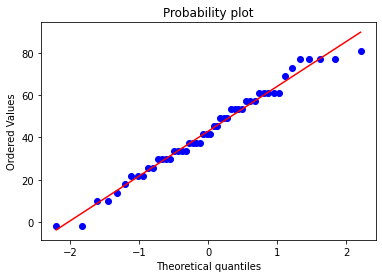

In [150]:
y_pred = model_cars.predict(cars_df)
fig = plt.figure()
res = stats.probplot(y_pred, plot=plt)
plt.title('Probability plot')
plt.show()

In [151]:
import numpy as np
influence = model_cars.get_influence()
inf_df = influence.summary_frame()
inf_df.head()

,dfb_Intercept,dfb_speed,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.094402,-0.086246,0.004592,0.266042,0.114861,0.095836,0.263450,0.094903
1,0.292425,-0.267160,0.043514,0.818933,0.114861,0.295005,0.816078,0.293977
2,-0.107498,0.093693,0.006202,-0.401346,0.071504,-0.111376,-0.397812,-0.110396
3,0.218976,-0.190855,0.025467,0.813266,0.071504,0.225687,0.810353,0.224879
4,0.034075,-0.029014,0.000645,0.142162,0.059971,0.035907,0.140703,0.035539


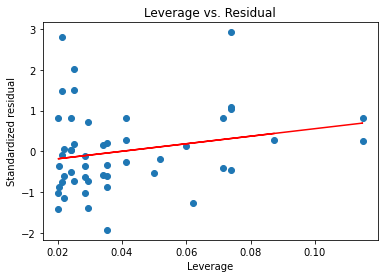

In [152]:
import numpy as np
from sklearn.linear_model import LinearRegression
plt.scatter(influence.hat_matrix_diag, inf_df.standard_resid)
fit = np.polyfit(influence.hat_matrix_diag, inf_df.standard_resid, 1)
fit_fn = np.poly1d(fit)
plt.plot(influence.hat_matrix_diag, fit_fn(influence.hat_matrix_diag),
"r")
plt.xlabel("Leverage")
plt.ylabel("Standardized residual")
plt.title("Leverage vs. Residual")
plt.show()